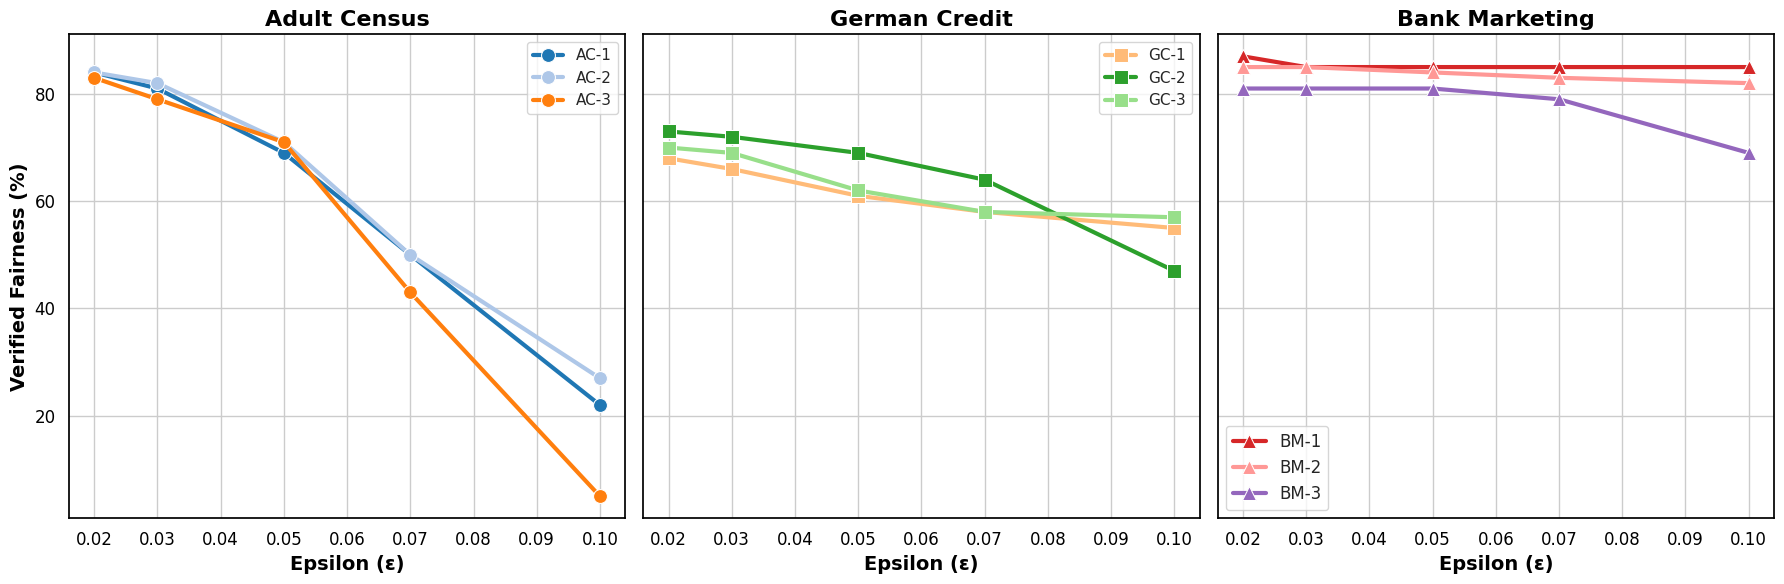

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# Function to get the latest file matching the pattern
def get_latest_file(pattern):
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No files matching pattern {pattern}")
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Function to rename models for plotting
def rename_model(model):
    model_label = model.split(".")[0]
    rename_dict = {
        'AC-3': 'AC-2',
        'AC-4': 'AC-3',
        'BM-5': 'BM-1',
        'BM-6': 'BM-2',
        'BM-7': 'BM-3'
    }
    return rename_dict.get(model_label, model_label)

# Function to plot fairness for a dataset using Seaborn
def plot_fairness(title, plain_df, ax, models_to_plot=None, palette=None, markers=None, markersize=8):
    epsilon_values = np.array([0.02, 0.03, 0.05, 0.07, 0.1])
    if models_to_plot:
        plain_df = plain_df[plain_df['Model'].isin(models_to_plot)]
    
    models = plain_df['Model'].unique()

    for idx, model in enumerate(models):
        plain_model_df = plain_df[(plain_df['Model'] == model) & (plain_df['Epsilon'].isin(epsilon_values))]

        if not plain_model_df.empty:
            model_label = rename_model(model)
            dataset = plain_df['Dataset'].iloc[0]  # Get the dataset name
            sns.lineplot(x='Epsilon', y='FairPercent', data=plain_model_df, ax=ax, label=f'{model_label}', color=palette[idx], linestyle='-', marker=markers[dataset], markersize=markersize, linewidth=3)

    ax.set_title(title, color='black', fontsize=16, fontweight='bold')
    ax.set_xlabel('Epsilon (ε)', color='black', fontsize=14, fontweight='bold')
    ax.set_ylabel('Verified Fairness (%)', color='black', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='both', colors='black', labelsize=12)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')

# Load the CSV files
datasets = ['adult', 'german', 'bank']
dataset_titles = ['Adult Census', 'German Credit', 'Bank Marketing']
fig, ax = plt.subplots(1, len(datasets), figsize=(18, 6), sharey=True)

# Apply Seaborn style
sns.set(style='whitegrid')

# Specify the models to plot
models_to_plot = {
    'adult': ['AC-1.onnx', 'AC-3.onnx', 'AC-4.onnx'],
    'german': ['GC-1.onnx', 'GC-2.onnx', 'GC-3.onnx'],
    'bank': ['BM-5.onnx', 'BM-6.onnx', 'BM-7.onnx']
}

# Define markers for each dataset
markers = {
    'adult': 'o',   # Circle
    'german': 's',  # Square
    'bank': '^'     # Triangle
}

# Create a combined palette for all models
total_models = sum([len(models) for models in models_to_plot.values()])
combined_palette = sns.color_palette('tab20', total_models)

# Split the combined palette for each subplot
start_idx = 0
for i, (dataset, title) in enumerate(zip(datasets, dataset_titles)):
    plain_pattern = f'./verification_results/{dataset}_verify_results*.csv'
    
    plain_file = get_latest_file(plain_pattern)
    
    plain_df = pd.read_csv(plain_file)
    plain_df['Dataset'] = dataset  # Add a column to identify the dataset

    num_models = len(models_to_plot[dataset])
    end_idx = start_idx + num_models
    plot_fairness(title, plain_df, ax[i], models_to_plot[dataset], combined_palette[start_idx:end_idx], markers, markersize=10)
    start_idx = end_idx

plt.tight_layout()
plt.legend(fontsize=12)
plt.savefig('fairness_plot.png')
plt.show()


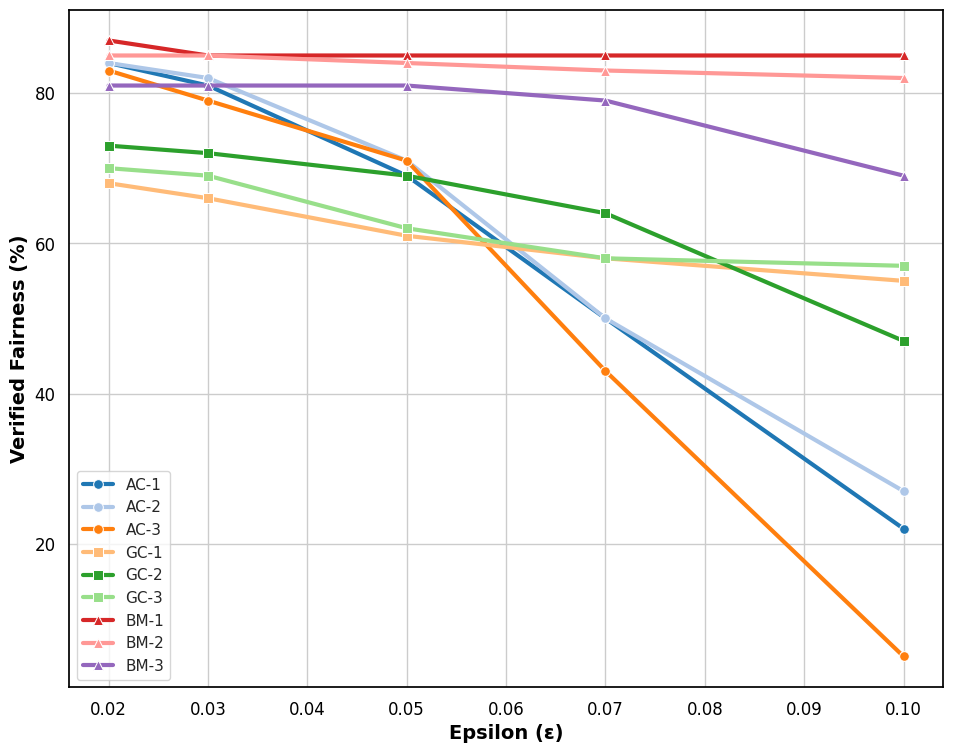

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# Function to get the latest file matching the pattern
def get_latest_file(pattern):
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No files matching pattern {pattern}")
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Function to rename models for plotting
def rename_model(model):
    model_label = model.split(".")[0]
    rename_dict = {
        'AC-3': 'AC-2',
        'AC-4': 'AC-3',
        'BM-5': 'BM-1',
        'BM-6': 'BM-2',
        'BM-7': 'BM-3'
    }
    return rename_dict.get(model_label, model_label)

# Function to plot fairness for a dataset using Seaborn
def plot_fairness(all_data, ax, palette=None, markers=None, markersize=8):
    epsilon_values = np.array([0.02, 0.03, 0.05, 0.07, 0.1])
    
    models = all_data['Model'].unique()

    for idx, model in enumerate(models):
        model_df = all_data[(all_data['Model'] == model) & (all_data['Epsilon'].isin(epsilon_values))]

        if not model_df.empty:
            model_label = rename_model(model)
            dataset = model_df['Dataset'].iloc[0]  # Get the dataset name
            sns.lineplot(x='Epsilon', y='FairPercent', data=model_df, ax=ax, label=f'{model_label}', color=palette[idx], marker=markers[dataset], markersize=markersize, linestyle='-', linewidth=3)
        else:
            print(f"Skipping model {model} due to missing data.")

# ax.set_title('Combined Dataset', color='black', fontsize=16)
    ax.set_xlabel('Epsilon (ε)', color='black', fontsize=14, fontweight='bold')
    ax.set_ylabel('Verified Fairness (%)', color='black', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', colors='black', labelsize=12)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')

# Load the CSV files
datasets = ['adult', 'german', 'bank']
all_data = pd.DataFrame()

# Apply Seaborn style
sns.set(style='whitegrid')

# Specify the models to plot
models_to_plot = {
    'adult': ['AC-1.onnx', 'AC-3.onnx', 'AC-4.onnx'],
    'german': ['GC-1.onnx', 'GC-2.onnx', 'GC-3.onnx'],
    'bank': ['BM-5.onnx', 'BM-6.onnx', 'BM-7.onnx']
}

# Define markers for each dataset
markers = {
    'adult': 'o',   # Circle
    'german': 's',  # Square
    'bank': '^'     # Triangle
}

# Load and concatenate data from all datasets
for dataset in datasets:
    plain_pattern = f'./verification_results/{dataset}_verify_results*.csv'
    plain_file = get_latest_file(plain_pattern)
    plain_df = pd.read_csv(plain_file)
    plain_df['Dataset'] = dataset  # Add a column to identify the dataset
    all_data = pd.concat([all_data, plain_df], ignore_index=True)

# Filter for models to plot
all_data = all_data[all_data['Model'].isin(sum(models_to_plot.values(), []))]

# Create a combined palette for all models
total_models = all_data['Model'].nunique()
combined_palette = sns.color_palette('tab20', total_models)

fig, ax = plt.subplots(figsize=(10, 8))  # Create a single plot

# Plot the fairness data
plot_fairness(all_data, ax, combined_palette, markers, markersize=7)

plt.tight_layout(pad=2.0)  # Adjust the padding to reduce space around the plot
plt.legend()
plt.savefig('fairness_plot_combined.png')
plt.show()


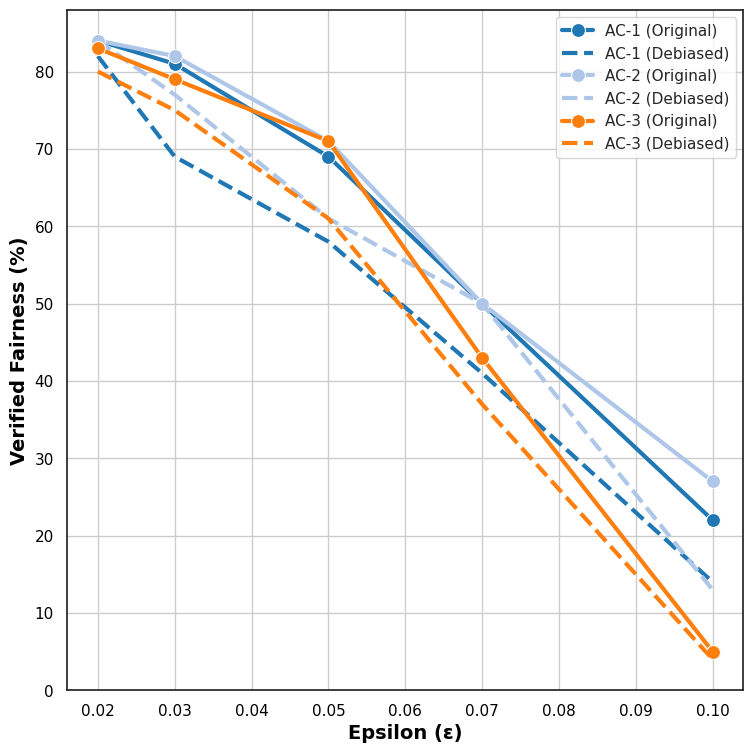

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# Function to get the latest file matching the pattern
def get_latest_file(pattern):
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No files matching pattern {pattern}")
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Function to plot fairness for a dataset using Seaborn
def plot_fairness(dataset, plain_df, debiased_df, ax, models_to_plot=None, markersize=8):
    epsilon_values = np.array([0.02, 0.03, 0.05, 0.07, 0.1])
    color_map = {
        'AC-1': '#1f77b4',  # Blue
        'AC-2': '#aec7e8',  # Light Blue
        'AC-3': '#ff7f0e',  # Orange
    }
    if models_to_plot:
        plain_df = plain_df[plain_df['Model'].isin(models_to_plot)]
        debiased_df = debiased_df[debiased_df['Model'].isin(models_to_plot)]
    
    models = plain_df['Model'].unique()

    for idx, model in enumerate(models):
        plain_model_df = plain_df[(plain_df['Model'] == model) & (plain_df['Epsilon'].isin(epsilon_values))]
        debiased_model_df = debiased_df[(debiased_df['Model'] == model) & (debiased_df['Epsilon'].isin(epsilon_values))]

        if not plain_model_df.empty and not debiased_model_df.empty:
            # Rename models in the plot labels
            model_label = model.split(".")[0]
            if model_label == 'AC-3':
                model_label = 'AC-2'
            if model_label == 'AC-4':
                model_label = 'AC-3'

            color = color_map.get(model_label, sns.color_palette('tab10')[idx])
            sns.lineplot(x='Epsilon', y='FairPercent', data=plain_model_df, ax=ax, label=f'{model_label} (Original)', color=color, linestyle='-', marker='o', markersize=markersize, linewidth=3)
            sns.lineplot(x='Epsilon', y='FairPercent', data=debiased_model_df, ax=ax, label=f'{model_label} (Debiased)', color=color, linestyle='--', linewidth=3)
        else:
            print(f"Skipping model {model} due to missing data.")

    ax.set_xlabel('Epsilon (ε)', color='black', fontsize=14, fontweight='bold')
    ax.set_ylabel('Verified Fairness (%)', color='black', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', colors='black')
    ax.grid(True)  # Add grid lines back


# Load the CSV files
dataset = 'adult'  # Assuming there is only one dataset to plot
plain_pattern = f'./verification_results/{dataset}_verify_results*.csv'
debiased_pattern = f'./verification_results/{dataset}_verify_debiased_results*.csv'

plain_file = get_latest_file(plain_pattern)
debiased_file = get_latest_file(debiased_pattern)

plain_df = pd.read_csv(plain_file)
debiased_df = pd.read_csv(debiased_file)

fig, ax = plt.subplots(figsize=(8, 8))

# Apply Seaborn style
sns.set(style='white')

# Specify the models to plot
models_to_plot = ['AC-1.onnx', 'AC-3.onnx', 'AC-4.onnx']  # Example list of models to plot

# Plot the fairness data
plot_fairness(dataset, plain_df, debiased_df, ax, models_to_plot, markersize=10)

plt.tight_layout(pad=2.0)  # Adjust the padding to reduce space around the plot
plt.legend()
plt.savefig('fairness_plot.png')
plt.show()

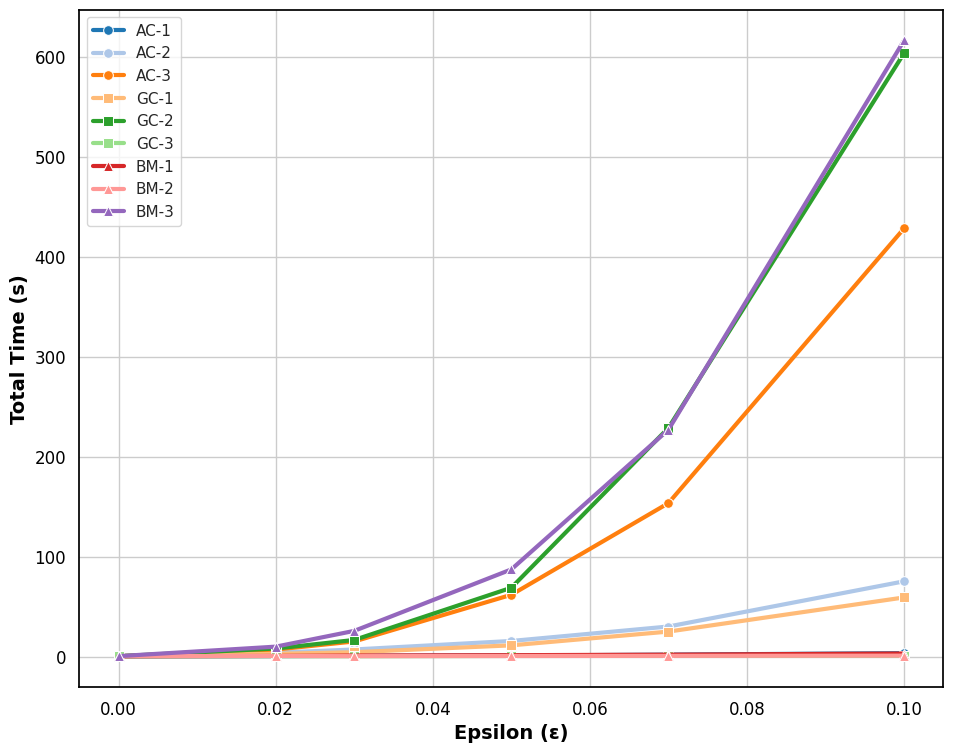

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import os

# Function to get the latest file matching the pattern
def get_latest_file(pattern):
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No files matching pattern {pattern}")
    latest_file = max(files, key=os.path.getctime)
    return latest_file

# Function to rename models for plotting
def rename_model(model):
    model_label = model.split(".")[0]
    rename_dict = {
        'AC-3': 'AC-2',
        'AC-4': 'AC-3',
        'BM-5': 'BM-1',
        'BM-6': 'BM-2',
        'BM-7': 'BM-3'
    }
    return rename_dict.get(model_label, model_label)

# Function to plot fairness for a dataset using Seaborn
def plot_fairness(all_data, ax, palette=None, markers=None, markersize=8):
    models = all_data['Model'].unique()

    for idx, model in enumerate(models):
        model_df = all_data[all_data['Model'] == model]

        if not model_df.empty:
            model_label = rename_model(model)
            dataset = model_df['Dataset'].iloc[0]  # Get the dataset name
            sns.lineplot(x='Epsilon', y='TotalTime', data=model_df, ax=ax, label=f'{model_label}', color=palette[idx], marker=markers[dataset], markersize=markersize, linestyle='-',linewidth=3)
        else:
            print(f"Skipping model {model} due to missing data.")

    ax.set_xlabel('Epsilon (ε)', color='black', fontsize=14, fontweight='bold')
    ax.set_ylabel('Total Time (s)', color='black', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', colors='black', labelsize=12)
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')

# Load the CSV files
datasets = ['adult', 'german', 'bank']
all_data = pd.DataFrame()

# Apply Seaborn style
sns.set(style='whitegrid')

# Specify the models to plot
models_to_plot = {
    'adult': ['AC-1.onnx', 'AC-3.onnx', 'AC-4.onnx'],
    'german': ['GC-1.onnx', 'GC-2.onnx', 'GC-3.onnx'],
    'bank': ['BM-5.onnx', 'BM-6.onnx', 'BM-7.onnx']
}

# Define markers for each dataset
markers = {
    'adult': 'o',   # Circle
    'german': 's',  # Square
    'bank': '^'     # Triangle
}

# Load and concatenate data from all datasets
for dataset in datasets:
    plain_pattern = f'./verification_results/{dataset}_verify_results*.csv'
    plain_file = get_latest_file(plain_pattern)
    plain_df = pd.read_csv(plain_file)
    plain_df['Dataset'] = dataset  # Add a column to identify the dataset
    all_data = pd.concat([all_data, plain_df], ignore_index=True)

# Filter for models to plot
all_data = all_data[all_data['Model'].isin(sum(models_to_plot.values(), []))]

# Create a combined palette for all models
total_models = all_data['Model'].nunique()
combined_palette = sns.color_palette('tab20', total_models)

fig, ax = plt.subplots(figsize=(10, 8))  # Create a single plot

# Plot the fairness data
plot_fairness(all_data, ax, combined_palette, markers, markersize=7)

plt.tight_layout(pad=2.0)  # Adjust the padding to reduce space around the plot
plt.legend()
plt.savefig('fairness_plot_combined.png')
plt.show()
